In [4]:
class TreeNode:
    def __init__(self, name, weight=1):
        self.name = name
        self.weight = weight
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

def calculate_weighted_tree_similarity(node1, node2):
    if node1.name != node2.name:
        return 0  # Nodes have different names, not similar

    # Calculate similarity based on node weight and the weighted sum of child similarities
    similarity = node1.weight * node2.weight

    for child1, child2 in zip(node1.children, node2.children):
        similarity += calculate_weighted_tree_similarity(child1, child2)

    return similarity

# Example trees
root1 = TreeNode("Ahmad", 5)
root1.add_child(TreeNode("Wafi", 4))
root1.add_child(TreeNode("Fathurrahman", 12))
root1.children[0].add_child(TreeNode("D", 3))

root2 = TreeNode("Rus", 3)
root2.add_child(TreeNode("Bitch", 5))
root2.add_child(TreeNode("Close", 5))
root2.children[0].add_child(TreeNode("D", 1))

# Calculate Weighted Tree Similarity
similarity = calculate_weighted_tree_similarity(root1, root2)
print(f"Weighted Tree Similarity: {similarity}")

Weighted Tree Similarity: 0


In [1]:
pip install cgi

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cgi (from versions: none)
ERROR: No matching distribution found for cgi

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import pandas as pd

# Data dummy
data = {'title': ['The Avengers', 'Avengers: Age of Ultron', 'Avengers: Infinity War', 'Iron Man', 'Iron Man 2', 'Iron Man 3'],
        'genre': ['Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
        'description': ['Earths mightiest heroes must come together and learn to fight as a team if they are to stop the mischievous Loki and his alien army from enslaving humanity.',
                        'When Tony Stark and Bruce Banner try to jump-start a dormant peacekeeping program called Ultron, things go horribly wrong and its up to Earths mightiest heroes to stop the villainous Ultron from enacting his terrible plans.',
                        'The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe.',
                        'After being held captive in an Afghan cave, billionaire engineer Tony Stark creates a unique weaponized suit of armor to fight evil.',
                        'With the world now aware of his identity as Iron Man, Tony Stark must contend with both his declining health and a vengeful mad man with ties to his fathers legacy.',
                        'When Tony Starks world is torn apart by a formidable terrorist called the Mandarin, he starts an odyssey of rebuilding and retribution.']
        }

# Membuat DataFrame
movies = pd.DataFrame(data)

# Menghitung TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
movies['description'] = movies['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(movies['description'])

# Menghitung skor kesamaan kosinus
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Fungsi untuk mendapatkan rekomendasi berdasarkan judul
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Contoh pemanggilan fungsi
print(get_recommendations('Iron Man'))


ModuleNotFoundError: No module named 'sklearn'

In [8]:
import math
from functools import reduce
from collections import defaultdict

class WeightedTreeSimilarity:
    def __init__(self, cursor):
        self.n = 0
        self.dictionary = set()
        self.postings = defaultdict(dict)
        self.frekuensi_dokumen = defaultdict(int)
        self.length = defaultdict(float)
        self.characters = " .,!#$%^&*();:\n\t\\\"?!{}[]<>"

        self.main(cursor)

    def main(self, cursor):
        self.inisialisasi_dokumen(cursor)
        self.inisialisasi_frekuensi_dokumen()
        self.inisialisasi_lengths()

    def inisialisasi_dokumen(self, cursor):
        cursor.execute("SELECT id_buku, judul, abstrak FROM publikasi")
        rows = cursor.fetchall()
        self.n = len(rows)
        for row in rows:
            id = row[0]
            database = row[1]
            istilah = self.tokenisasi(database)
            istilah_unik = set(istilah)
            self.dictionary = self.dictionary.union(istilah_unik)
            for term in istilah_unik:
                self.postings[term][id] = istilah.count(term)

    def tokenisasi(self, database):
        istilah = database.lower().split()
        return [term.strip(self.characters) for term in istilah]

    def inisialisasi_frekuensi_dokumen(self):
        for term in self.dictionary:
            self.frekuensi_dokumen[term] = len(self.postings[term])

    def inisialisasi_lengths(self):
        for id in range(1, self.n + 1):
            l = 0
            for term in self.dictionary:
                l += self.tfidf(term, id) ** 2
            if l != 0:
                self.length[id] = math.sqrt(l)
            else:
                self.length[id] = 1

    def tfidf(self, term, id):
        if id in self.postings[term]:
            return self.postings[term][id] * self.inverse_frekuensi_dokumen(term)
        else:
            return 0.0

    def inverse_frekuensi_dokumen(self, term):
        if term in self.dictionary:
            return math.log(self.n / self.frekuensi_dokumen[term], 2)
        else:
            return 0.0

    def weighted_tree_similarity(self, query):
        q_terms = self.tokenisasi(query)
        q_vector = [self.tfidf(term, 0) for term in q_terms]  # Query memiliki id 0
        result = {}

        for id in range(1, self.n + 1):
            d_vector = [self.tfidf(term, id) for term in q_terms]
            result[id] = self.cosine_similarity(q_vector, d_vector)

        return result

    def cosine_similarity(self, vector1, vector2):
        dot_product = sum(x * y for x, y in zip(vector1, vector2))
        magnitude1 = math.sqrt(sum(x ** 2 for x in vector1))
        magnitude2 = math.sqrt(sum(x ** 2 for x in vector2))

        if magnitude1 == 0 or magnitude2 == 0:
            return 0.0
        else:
            return dot_product / (magnitude1 * magnitude2)

# Contoh Penggunaan
cursor = your_database_cursor  # Gantilah dengan kursor database yang sesuai
wts = WeightedTreeSimilarity(cursor)
query = "Your query here"
result = wts.weighted_tree_similarity(query)

# Output hasil similarity untuk setiap dokumen
for doc_id, similarity in result.items():
    print(f"Dokumen {doc_id}: Similarity = {similarity}")


1.0
1.0


In [3]:
import networkx as nx

def weighted_tree_similarity(tree1, tree2):
    # Simulasi bobot pada simpul dan tepi
    node_weights_tree1 = {'A': 2, 'B': 3, 'C': 1}
    edge_weights_tree1 = {('A', 'B'): 1, ('A', 'C'): 2}
    
    node_weights_tree2 = {'A': 3, 'B': 2, 'C': 1}
    edge_weights_tree2 = {('A', 'B'): 2, ('A', 'C'): 1}
    
    # Gunakan NetworkX untuk membangun graf
    G1 = nx.Graph()
    G2 = nx.Graph()
    
    for node, weight in node_weights_tree1.items():
        G1.add_node(node, weight=weight)
        
    for edge, weight in edge_weights_tree1.items():
        G1.add_edge(*edge, weight=weight)
    
    for node, weight in node_weights_tree2.items():
        G2.add_node(node, weight=weight)
        
    for edge, weight in edge_weights_tree2.items():
        G2.add_edge(*edge, weight=weight)
    
    # Hitung weighted tree similarity menggunakan algoritma khusus
    # ... (implementasi algoritma)

# Contoh pemanggilan fungsi
similarity_score = weighted_tree_similarity(tree1, tree2)
print(f"Weighted Tree Similarity Score: {similarity_score}")

NameError: name 'tree1' is not defined

In [ ]:
import math
from functools import reduce
from collections import defaultdict

class WeightedTreeSimilarity:
    def __init__(self, cursor):
        self.n = 0
        self.dictionary = set()
        self.postings = defaultdict(dict)
        self.frekuensi_dokumen = defaultdict(int)
        self.length = defaultdict(float)
        self.characters = " .,!#$%^&*();:\n\t\\\"?!{}[]<>"

        self.main(cursor)

    def main(self, cursor):
        self.inisialisasi_dokumen(cursor)
        self.inisialisasi_frekuensi_dokumen()
        self.inisialisasi_lengths()

    def inisialisasi_dokumen(self, cursor):
        cursor.execute("SELECT id_buku, judul, abstrak FROM publikasi")
        rows = cursor.fetchall()
        self.n = len(rows)
        for row in rows:
            id = row[0]
            database = row[1]
            istilah = self.tokenisasi(database)
            istilah_unik = set(istilah)
            self.dictionary = self.dictionary.union(istilah_unik)
            for term in istilah_unik:
                self.postings[term][id] = istilah.count(term)

    def tokenisasi(self, database):
        istilah = database.lower().split()
        return [term.strip(self.characters) for term in istilah]

    def inisialisasi_frekuensi_dokumen(self):
        for term in self.dictionary:
            self.frekuensi_dokumen[term] = len(self.postings[term])

    def inisialisasi_lengths(self):
        for id in range(1, self.n + 1):
            l = 0
            for term in self.dictionary:
                l += self.tfidf(term, id) ** 2
            if l != 0:
                self.length[id] = math.sqrt(l)
            else:
                self.length[id] = 1

    def tfidf(self, term, id):
        if id in self.postings[term]:
            return self.postings[term][id] * self.inverse_frekuensi_dokumen(term)
        else:
            return 0.0

    def inverse_frekuensi_dokumen(self, term):
        if term in self.dictionary:
            return math.log(self.n / self.frekuensi_dokumen[term], 2)
        else:
            return 0.0

    def weighted_tree_similarity(self, query):
        q_terms = self.tokenisasi(query)
        q_vector = [self.tfidf(term, 0) for term in q_terms]  # Query memiliki id 0
        result = {}

        for id in range(1, self.n + 1):
            d_vector = [self.tfidf(term, id) for term in q_terms]
            result[id] = self.cosine_similarity(q_vector, d_vector)

        return result

    def cosine_similarity(self, vector1, vector2):
        dot_product = sum(x * y for x, y in zip(vector1, vector2))
        magnitude1 = math.sqrt(sum(x ** 2 for x in vector1))
        magnitude2 = math.sqrt(sum(x ** 2 for x in vector2))

        if magnitude1 == 0 or magnitude2 == 0:
            return 0.0
        else:
            return dot_product / (magnitude1 * magnitude2)

# Contoh Penggunaan
cursor = your_database_cursor  # Gantilah dengan kursor database yang sesuai
wts = WeightedTreeSimilarity(cursor)
query = "Your query here"
result = wts.weighted_tree_similarity(query)

# Output hasil similarity untuk setiap dokumen
for doc_id, similarity in result.items():
    print(f"Dokumen {doc_id}: Similarity = {similarity}")

In [9]:
class WeightedTreeSimilarity:
    def __init__(self):
        self.query_vector = None
        self.document_vector = None

    def calculate_similarity(self, query, document):
        # Langkah 1: Menghitung nilai similarity pada tiap-tiap parameter terhadap query
        self.calculate_vectors(query, document)

        # Langkah 2: Menghitung bobot parameter
        query_weights = self.calculate_weights(self.query_vector)
        document_weights = self.calculate_weights(self.document_vector)

        # Langkah 3: Menghitung nilai similarity total dari query dan dokumen
        total_similarity = self.calculate_total_similarity(query_weights, document_weights)

        return total_similarity

    def calculate_vectors(self, query, document):
        # Menghitung vektor query
        self.query_vector = self.calculate_vector(query)

        # Menghitung vektor dokumen
        self.document_vector = self.calculate_vector(document)

    def calculate_vector(self, terms_frequency):
        # Menghitung vektor berdasarkan term-frekuensi
        vector = {}
        total_terms = sum(terms_frequency.values())

        for term, frequency in terms_frequency.items():
            # Normalisasi term frequency dengan total term frequency
            vector[term] = frequency / total_terms

        return vector

    def calculate_weights(self, vector):
        # Langkah 2: Menghitung bobot parameter
        total_term_frequency = sum(vector.values())
        weights = {term: frequency / total_term_frequency for term, frequency in vector.items()}
        return weights

    def calculate_total_similarity(self, query_weights, document_weights):
        # Langkah 3: Menghitung nilai similarity total dari query dan dokumen
        dot_product = sum(query_weights.get(term, 0) * document_weights.get(term, 0) for term in set(query_weights) & set(document_weights))
        magnitude_query = math.sqrt(sum(weight ** 2 for weight in query_weights.values()))
        magnitude_document = math.sqrt(sum(weight ** 2 for weight in document_weights.values()))

        if magnitude_query == 0 or magnitude_document == 0:
            return 0.0
        else:
            return dot_product / (magnitude_query * magnitude_document)

# Contoh penggunaan:
wts = WeightedTreeSimilarity()
query = {"kontol": 2, "babi": 3, "ngentod": 1}  # Contoh vektor query
document = {"babooo": 1, "kontol": 2, "ngentod": 3}  # Contoh vektor dokumen
similarity = wts.calculate_similarity(query, document)
print("Similarity:", similarity)

Similarity: 0.5


In [11]:
import re
from collections import defaultdict
import math

class Preprocessor:
    def __init__(self):
        pass

    def case_folding(self, text):
        return text.lower()

    def tokenize(self, text):
        words = re.findall(r'\b\w+\b', text)
        return words

    def filter_stopwords(self, tokens, stopwords):
        return [token for token in tokens if token not in stopwords]

    def stemming(self, tokens):
        # Implementasi stemming sesuai kebutuhan
        return tokens

class WeightedTreeSimilarity:
    def __init__(self):
        self.query_vector = None
        self.document_vector = None

    def calculate_similarity(self, query, document):
        # Langkah 1: Menghitung nilai similarity pada tiap-tiap parameter terhadap query
        self.calculate_vectors(query, document)

        # Langkah 2: Menghitung bobot parameter
        query_weights = self.calculate_weights(self.query_vector)
        document_weights = self.calculate_weights(self.document_vector)

        # Langkah 3: Menghitung nilai similarity total dari query dan dokumen
        total_similarity = self.calculate_total_similarity(query_weights, document_weights)

        return total_similarity

    def calculate_vectors(self, query, document):
        # Menghitung vektor query
        self.query_vector = self.calculate_vector(query)

        # Menghitung vektor dokumen
        self.document_vector = self.calculate_vector(document)

    def calculate_vector(self, terms_frequency):
        # Menghitung vektor berdasarkan term-frekuensi
        vector = {}
        total_terms = sum(terms_frequency.values())

        for term, frequency in terms_frequency.items():
            # Normalisasi term frequency dengan total term frequency
            vector[term] = frequency / total_terms

        return vector

    def calculate_weights(self, vector):
        # Langkah 2: Menghitung bobot parameter
        total_term_frequency = sum(vector.values())
        weights = {term: frequency / total_term_frequency for term, frequency in vector.items()}
        return weights

    def calculate_total_similarity(self, query_weights, document_weights):
        # Langkah 3: Menghitung nilai similarity total dari query dan dokumen
        dot_product = sum(query_weights.get(term, 0) * document_weights.get(term, 0) for term in set(query_weights) & set(document_weights))
        magnitude_query = math.sqrt(sum(weight ** 2 for weight in query_weights.values()))
        magnitude_document = math.sqrt(sum(weight ** 2 for weight in document_weights.values()))

        if magnitude_query == 0 or magnitude_document == 0:
            return 0.0
        else:
            return dot_product / (magnitude_query * magnitude_document)

# Contoh Penggunaan
preprocessor = Preprocessor()
wts = WeightedTreeSimilarity()

# Praproses Data
judul_query = "Contoh Judul Buku"
sinopsis_query = "Sinopsis buku yang panjangnya beberapa kalimat."
pengarang_query = "Nama Pengarang"

judul_dokumen = "Judul Buku di Database"
sinopsis_dokumen = "Sinopsis buku di database yang juga beberapa kalimat."
pengarang_dokumen = "Pengarang di Database"

judul_query = preprocessor.tokenize(preprocessor.case_folding(judul_query))
sinopsis_query = preprocessor.tokenize(preprocessor.case_folding(sinopsis_query))
pengarang_query = preprocessor.tokenize(preprocessor.case_folding(pengarang_query))

judul_dokumen = preprocessor.tokenize(preprocessor.case_folding(judul_dokumen))
sinopsis_dokumen = preprocessor.tokenize(preprocessor.case_folding(sinopsis_dokumen))
pengarang_dokumen = preprocessor.tokenize(preprocessor.case_folding(pengarang_dokumen))

# Proses Perhitungan Similarity
query = {"judul": judul_query, "sinopsis": sinopsis_query, "pengarang": pengarang_query}
dokumen = {"judul": judul_dokumen, "sinopsis": sinopsis_dokumen, "pengarang": pengarang_dokumen}

similarity = wts.calculate_similarity(query, dokumen)
print("Similarity:", similarity)


TypeError: unsupported operand type(s) for +: 'int' and 'list'

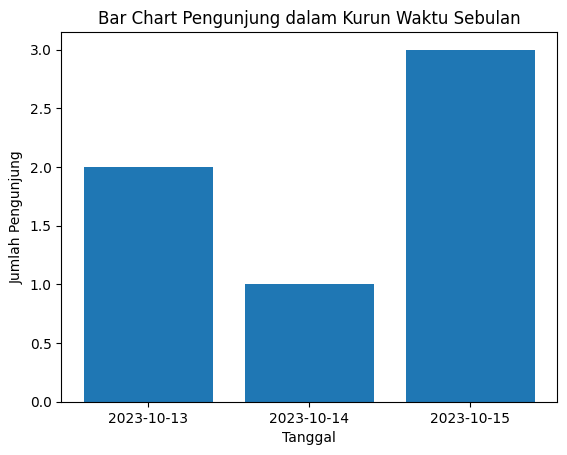

None


In [8]:
# Data pengunjung (contoh data)
pengunjung_data = [
    {"id": 3, "nama": "Ahmad Wafi Fathurrahman", "telepon": "085854540754", "jenis_kelamin": "L", "tanggal": "2023-10-13"},
    {"id": 4, "nama": "Ahmad Wafi Fathurrahman", "telepon": "085854540754", "jenis_kelamin": "L", "tanggal": "2023-10-13"},
    {"id": 5, "nama": "Ahmad Wafi Fathurrahman", "telepon": "085854540754", "jenis_kelamin": "L", "tanggal": "2023-10-14"},
    {"id": 6, "nama": "Ahmad Wafi Fathurrahman", "telepon": "085854540754", "jenis_kelamin": "L", "tanggal": "2023-10-15"},
    {"id": 7, "nama": "Ahmad Wafi Fathurrahman", "telepon": "085854540754", "jenis_kelamin": "L", "tanggal": "2023-10-15"},
    {"id": 8, "nama": "Ahmad Wafi Fathurrahman", "telepon": "085854540754", "jenis_kelamin": "L", "tanggal": "2023-10-15"},
    # Tambahkan data lainnya sesuai kebutuhan
]

import matplotlib.pyplot as plt
from collections import Counter

# Mengambil data untuk Chart
dates = [entry['tanggal'] for entry in pengunjung_data]
counts = Counter(dates)

# Membuat bar chart menggunakan Matplotlib
plt.bar(counts.keys(), counts.values())
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengunjung')
plt.title('Bar Chart Pengunjung dalam Kurun Waktu Sebulan')

# Menampilkan plot
gambar = plt.show()
print(gambar)

In [1]:
pip install flask-socketio

  Obtaining dependency information for flask-socketio from https://files.pythonhosted.org/packages/56/c8/dc0be9e26272dc89342868ecc2d9ddb9e31002b4b8e49fdb754aa0f9ecbf/Flask_SocketIO-5.3.6-py3-none-any.whl.metadata
  Obtaining dependency information for python-socketio>=5.0.2 from https://files.pythonhosted.org/packages/f8/bf/4790ed063ca2daa58fb20285fc3707218cf01e174209355d081d83094f6d/python_socketio-5.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for python-engineio>=4.8.0 from https://files.pythonhosted.org/packages/8b/89/70ebee15c1ef37d3a5408dbb03e57aa226dc6f1921735ed8cd59ac2a0136/python_engineio-4.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for simple-websocket>=0.10.0 from https://files.pythonhosted.org/packages/6d/ea/288a8ac1d9551354488ff60c0ac6a76acc3b6b60f0460ac1944c75e240da/simple_websocket-1.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/74.4 kB ? eta -:--:--
   ---------------- ----------------------- 30.


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import math

math.sqrt(3)**2

2.9999999999999996

In [19]:
import re
print(re.__version__)

2.2.1
